# Pypharma HRServices Data 

##  Dependencies and Setup

In [1]:
  # Importing library
%matplotlib inline

In [2]:
  # Importing external packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
  # File to Load 
ticket_data = "output_data//cleansed_dataframe.xlsx"

In [5]:
  # Read the Ticket file and store Pandas data frame
df_ticket_cl = pd.read_excel(ticket_data)

# Print out in the window
df_ticket_cl.head()

,Case ID,Company,Region,Status,Source,Current Agent,Creation Date,Due Date,Closed Date,Service Group,...,Creation Year,Creation Month,Creation Day,Due_Date,Due Time,Due Year,Due Month,Due Day,Closed_Date,Closed Time
0,8111665,AU,APAC,Closed,E-mail,MYHRW_JuliusB,11/05/18 22:07,11/20/18 21:00,11/16/18 07:45,MyHRW,...,2018,11,5,2018-11-20,21:00:00,2018,11,20,2018-11-16,07:45:00
1,8111974,AU,APAC,Closed,E-mail,MyHRW_AdamSu,11/05/18 23:00,11/13/18 22:01,11/05/18 23:21,MyHRW,...,2018,11,5,2018-11-13,22:01:00,2018,11,13,2018-11-05,23:21:00
2,8112663,AU,APAC,Closed,E-mail,MyHRW_AdamSu,11/06/18 04:18,11/07/18 22:01,11/06/18 04:52,MyHRW,...,2018,11,6,2018-11-07,22:01:00,2018,11,7,2018-11-06,04:52:00
3,8112727,AU,APAC,Closed,Interface,MyHRW_AdamSu,11/06/18 04:58,11/08/18 22:01,11/06/18 05:04,MyHRW,...,2018,11,6,2018-11-08,22:01:00,2018,11,8,2018-11-06,05:04:00
4,8112910,AU,APAC,Closed,E-mail,MYHRW_JuliusB,11/06/18 06:06,11/13/18 22:01,11/06/18 07:31,MyHRW,...,2018,11,6,2018-11-13,22:01:00,2018,11,13,2018-11-06,07:31:00


## II.  Service Center  Demand

The following graph displays the service center...

### The Service Type Demand

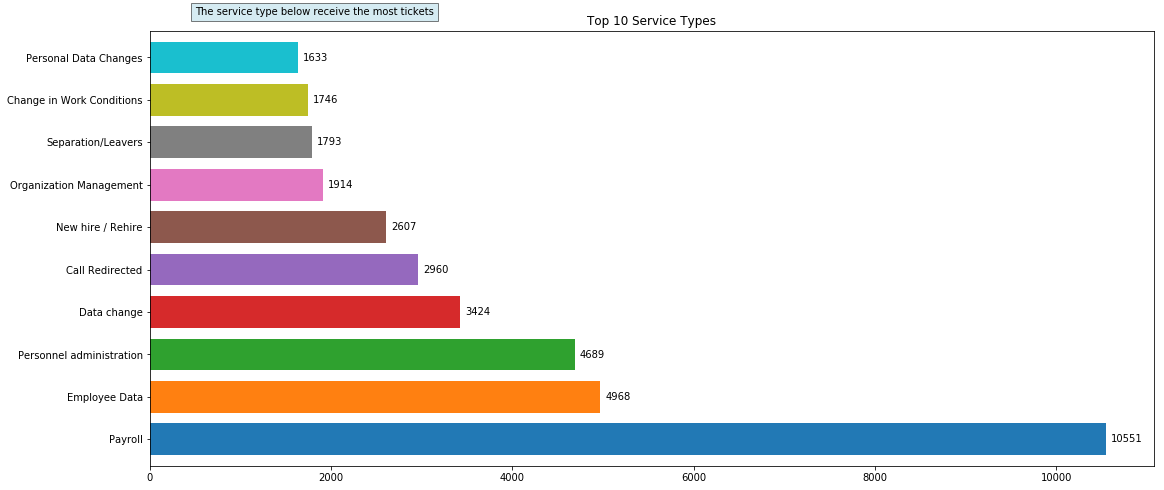

In [67]:
# The focus of this analysis, is ticket usage by service location
# Again, value_counts() is leveraged to find unique row count by service location
popular_Service_Type = df_ticket_cl['Service'].value_counts()
popular_Service_Type.sort_values(ascending = False).head(6)

# Plot covers the top 6 service locations that potray more usage than other locations
pop_location_chart = popular_Service_Type[0:10].plot(kind = "barh",width = 0.75,figsize = (18,8),alpha = 0.99)
plt.title("Top 10 Service Types")
plt.text(500,10,"The service type below receive the most tickets",bbox=dict(facecolor='Lightblue',alpha =0.5) )
#plt.text(300,6.5,"The service type below receive the most tickets",bbox=dict(facecolor='Lightblue',alpha =0.5) )


rects = pop_location_chart.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

    
plt.savefig("output_data/Top 6 Service Types.png",bbox_inches = "tight")
plt.show()

###  Service Center Demand (by category)

Many services cegories names have been used over the years. 

Jacksonville    32455
Granada         19711
Dalian           3104
Katowice         2927
Buenos Aires     1876
Manila           1735
St Johns         1688
US - AMO         1190
Name: Service Center, dtype: int64


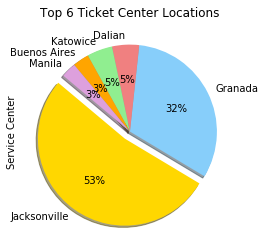

In [91]:
  # Analysis by Tickets Types helps determine which programs are popular. 
popular_category_type = df_ticket_cl['Service Center'].value_counts() 
print(popular_category_type.head(10))

# plot the graph for the popular mebership types 
explode = (0.1,0,0,0,0,0)
colors = ["gold", "lightskyblue", "lightcoral","lightgreen","orange","plum"]
popular_category_type[0:6].plot.pie(colors = colors , explode = explode, shadow=True,
autopct='%1.0f%%', startangle=140)

plt.title("Top 6 Ticket Center Locations")

plt.savefig("output_data/Top 6 Ticket Center Locations.png",bbox_inches = "tight")
plt.show()

In [ ]:
  # Analysis by Tickets Types helps determine which programs are popular. 
popular_category_type = df_ticket_cl['Source'].value_counts() 
print(popular_category_type.head(10))

# plot the graph for the popular mebership types 
explode = (0.1,0,0,0,0,0)
colors = ["gold", "lightskyblue", "lightcoral","lightgreen","orange","plum"]
popular_category_type[0:6].plot.pie(colors = colors , explode = explode, shadow=True )
plt.title("Top 6 Ticket Center Locations")
plt.savefig("output_data/Top 6 Ticket Sources.png",bbox_inches = "tight")
plt.show()

### Average Ticket Duration (by Service Center Category)

* 2014 - 2018 is being considered for this analysis..


In [ ]:
  # For each category type in the Top 5, prepare a data series with ticket durations
# Find the average for each category type
subscriber_type = df_ticket_cl['Service'].value_counts().index
top_subscriber_type = subscriber_type[0:6]

ticket_minutes = []
for element in top_subscriber_type:
  time_min = df_ticket_cl[df_ticket_cl['Closed Time'] == element]['Service'].values
  ticket_minutes.append(np.mean(time_min))

x_axis  =  np.arange(0, len(top_subscriber_type))
tick_locations = []
for x in x_axis:
  tick_locations.append(x)

ticket_minutes.sort(reverse=True)
plt.xticks(tick_locations, ["month","year"..], rotation=90)
colors = ["gold", "lightgreen","plum","lightcoral","orange","lightskyblue"]
plt.bar(height= ticket_minutes, x= tick_locations, color=colors,alpha = 0.75)
plt.title('Average Ticket Duration by Top Ticket Category Type')
plt.savefig("output_data/7_avg_duration_mem_type.png",bbox_inches = "tight")
plt.show()

### Average Trip Duration Over the Years (by Membership Category)

In this section we calculate the average trip duration and display the trip duration by membership type through the years. 

In [ ]:
# For each year, filter the data into a data frame.
# For that data frame, for the above selected top 5 category types 
# Calculate the average duration of tickets
fig, ax = plt.subplots(figsize=(20, 10))
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'20'}
w = 0.2
subscriber_type = df_ticket_cl['Ticket Category Type'].value_counts().index
top_subscriber_type = subscriber_type[0:6]

## For 2018
df_ticket_2018 = df_ticket_cl.loc[(df_ticket_cl["Ticket Year"] ==2018)]

ticket_minutes_2018 = []
for element in top_subscriber_type:
   time_min = df_ticket_2018[df_ticket_2018['Ticket Category Type'] == element]['Ticket Duration Minutes'].values
   ticket_minutes_2018.append(np.mean(time_min))

## For 2017

df_ticket_2017 = df_ticket_cl.loc[(df_ticket_cl["Ticket Year"] ==2017)]

ticket_minutes_2017 = []
for element in top_subscriber_type:
   time_min = df_ticket_2017[df_ticket_2017['Ticket Category Type'] == element]['Ticket Duration Minutes'].values
   ticket_minutes_2017.append(np.mean(time_min))

## For 2016

df_ticket_2016 = df_ticket_cl.loc[(df_ticket_cl["Ticket Year"] ==2016)]

ticket_minutes_2016 = []
for element in top_subscriber_type:
   time_min = df_ticket_2016[df_ticket_2016['Ticket Category Type'] == element]['Ticket Duration Minutes'].values
   ticket_minutes_2016.append(np.mean(time_min))

## For 2015

df_ticket_2015 = df_ticket_cl.loc[(df_ticket_cl["Ticket Year"] ==2015)]

ticket_minutes_2015 = []
for element in top_subscriber_type:
   time_min = df_ticket_2015[df_ticket_2015['Ticket Category Type'] == element]['Ticket Duration Minutes'].values
   ticket_minutes_2015.append(np.mean(time_min))

## For 2014

df_ticket_2014 = df_ticket_cl.loc[(df_ticket_cl["Ticket Year"] ==2014)]

ticket_minutes_2014 = []
for element in top_subscriber_type:
   time_min = df_ticket_2014[df_ticket_2014['Ticket Category Type'] == element]['Ticket Duration Minutes'].values
   ticket_minutes_2014.append(np.mean(time_min))


x_axis  =  np.arange(0, len(top_subscriber_type))
tick_locations = []
for x in x_axis:
   tick_locations.append(x)

# Plot with category types on X-axis and Minutes on Y-axis and stacked by year.
plt.setp(ax, xticks= tick_locations, xticklabels= top_subscriber_type)
plt.setp(ax.get_xticklabels(), rotation=70, fontsize= 20)
ax.bar(x_axis-0.5*w, ticket_minutes_2018,w,color='r',label='2018',alpha = 0.75)
ax.bar(x_axis, ticket_minutes_2017,w,color='g',label='2017',alpha = 0.75)
ax.bar(x_axis+0.5*w, ticket_minutes_2016,w,color='b',label='2016',alpha = 0.75)
ax.bar(x_axis+1*w, ticket_minutes_2015,w,color='y',label='2015',alpha = 0.75)
ax.bar(x_axis+1.5*w, ticket_minutes_2014,w,color='c',label='2014',alpha = 0.75)
ax.bar(x_axis+2*w, ticket_minutes_2013,w,color='m',label='2013',alpha = 0.75)

ax.set_title('Average Ticket Duration by Top Ticket Category Type (over the years)', **title_font)
ax.set_ylabel('Minutes', **axis_font)
ax.legend(loc=1, prop={'size': 16})
plt.savefig("Images/8_avg_duration_mem_type_year.png",bbox_inches = "tight")
plt.show()
